In [ ]:
#Please read through the comments for easy code navigation

# IMPORTING DATA, MODULES AND DOING PRE PROCESSING

In [ ]:
#PLease change the dependencies on the directory where given Corona India dataset is placed

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
data_all = pd.read_excel("corona india.xlsx")

In [ ]:
data_all.head()

In [ ]:
plt.plot(data_all["new_deaths"])

In [ ]:
#Clearly from the above graph, in the starting days, no such new covid cases were identified due to very less testing and other
#factors. We see considerable growth from the 80th day, that is from 2nd April, so we train the model from thereon.
#Last 28 days have been taken away as validation

In [ ]:
#Training data taken from 2 april, 2020 after corona began to spread
#Last 28 days taken for validation as stated in question
val_data = data_all[170-28:]
train_data = data_all[92:170-28]

In [ ]:
#Since our aim is to predict new cases we take the new_cases column for both train and validation data
new_cases_train = train_data["new_cases"]
new_cases_val = val_data["new_cases"]
#We take natural logarithm of our data as covid cases grow exponentially
new_cases_train = np.log(np.array(new_cases_train))
new_cases_val = np.log(np.array(new_cases_val))

In [ ]:
plt.plot(new_cases_train)
plt.title("Corona new cases in traning data with starting data from 2 April, 2020")

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x_train = np.array([i for i in range(0,new_cases_train.shape[0])])
model.fit(x_train.reshape([-1,1]), new_cases_train.reshape([-1,1]))

In [ ]:
x_val = np.array([i for i in range(new_cases_train.shape[0], new_cases_train.shape[0]+new_cases_val.shape[0])])
model.score(x_val.reshape([-1,1]), new_cases_val.reshape([-1,1]))

In [ ]:
#For our training data
plt.plot(new_cases_train)
plt.plot(model.predict(x_train.reshape([-1,1])))
plt.title("Training data using Linear Regression(Orange line is our predicted line)")

Text(0.5, 1.0, 'Validation data using Linear Regression(Orange line is our predicted line)')

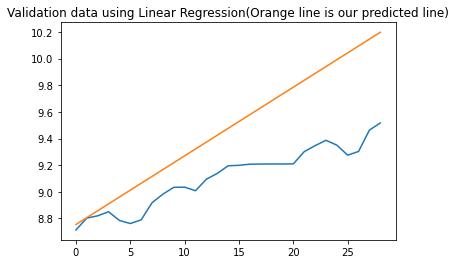

In [14]:
#for 28 day validation period
from sklearn.metrics import mean_squared_error
plt.plot(new_cases_val)
plt.plot(model.predict(x_val.reshape([-1,1])))
plt.title("Validation data using Linear Regression(Orange line is our predicted line)")

In [15]:
mse = mean_squared_error(np.exp(model.predict(x_val.reshape([-1,1]))), np.exp(new_cases_val))
print("The MSE on Validation data for fitting Linear Regression on our dataset is ", mse)

The MSE on Validation data for fitting Linear Regression on our dataset is  42831702.68997995


In [16]:
#We see that linear regression performs very poorly for forecasting new COVID-19 cases for the validation dataset

# ARIMA MODEL

In [17]:
#GRID SEARCH for best (p,d,q)


import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(arima_order):
    # prepare training dataset
    train_size = new_cases_train.shape[0]
    steps = new_cases_val.shape[0]
    history = [x for x in new_cases_train]
    
    # make predictions
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit(disp=0)
    predictions = model_fit.forecast(steps=steps)[0]
    error = mean_squared_error(np.exp(new_cases_val), np.exp(predictions))
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue           
    print("'Best ARIMA%s MSE=%.3f'" % (best_cfg, best_score))

p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

C:\Users\aman\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


ARIMA(0, 0, 0) MSE=61002683.681
ARIMA(0, 0, 1) MSE=60527568.541
ARIMA(0, 0, 2) MSE=60301814.264
ARIMA(0, 1, 0) MSE=16633018.944
ARIMA(0, 1, 1) MSE=43111124.292
ARIMA(0, 1, 2) MSE=36282238.729
ARIMA(0, 2, 0) MSE=29540111931.440
ARIMA(0, 2, 1) MSE=52823753.157
ARIMA(0, 2, 2) MSE=4175428.323
ARIMA(1, 0, 0) MSE=42599231.256
ARIMA(1, 0, 1) MSE=23949990.635
ARIMA(1, 0, 2) MSE=24049173.609
ARIMA(1, 1, 0) MSE=36524089.736
ARIMA(1, 1, 1) MSE=37263945.224
ARIMA(1, 1, 2) MSE=43115119.443
ARIMA(1, 2, 0) MSE=326112455.122
ARIMA(1, 2, 1) MSE=6027472.854
ARIMA(1, 2, 2) MSE=4275673.452
ARIMA(2, 0, 0) MSE=22867209.449
ARIMA(2, 0, 1) MSE=22545651.620
ARIMA(2, 0, 2) MSE=60554641.581
ARIMA(2, 1, 0) MSE=36197912.198
ARIMA(2, 1, 1) MSE=44521546.418
ARIMA(2, 2, 0) MSE=26650610.258
ARIMA(2, 2, 1) MSE=4832164.272
ARIMA(2, 2, 2) MSE=5896058.030
ARIMA(4, 0, 0) MSE=23027301.202
ARIMA(4, 0, 1) MSE=1926098116.386
ARIMA(4, 0, 2) MSE=198577211.359
ARIMA(4, 1, 0) MSE=36384786.396
ARIMA(4, 1, 1) MSE=36749407.008
ARIMA(

Text(0.5, 1.0, 'Validation data using ARIMA(red line is our predicted line)')

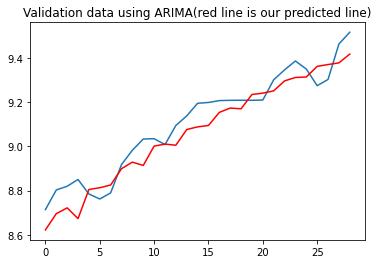

In [18]:
#Forecasting with best (p,d,q) tuple for our validation region
model = ARIMA(new_cases_train, order=(8,2,1))
model_fit = model.fit(disp=0)
predictions = model_fit.forecast(steps=new_cases_val.shape[0])[0]
pyplot.plot(new_cases_val)
pyplot.plot(predictions, color='red')
plt.title("Validation data using ARIMA(red line is our predicted line)")

In [19]:
print("ratio of MSE of Linear Regression to ARIMA", 42831702.68997995/451515.210)

ratio of MSE of Linear Regression to ARIMA 94.86214803257668
